<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_22176\4294952688.py:6: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\hurricane_data_satellite.csv")


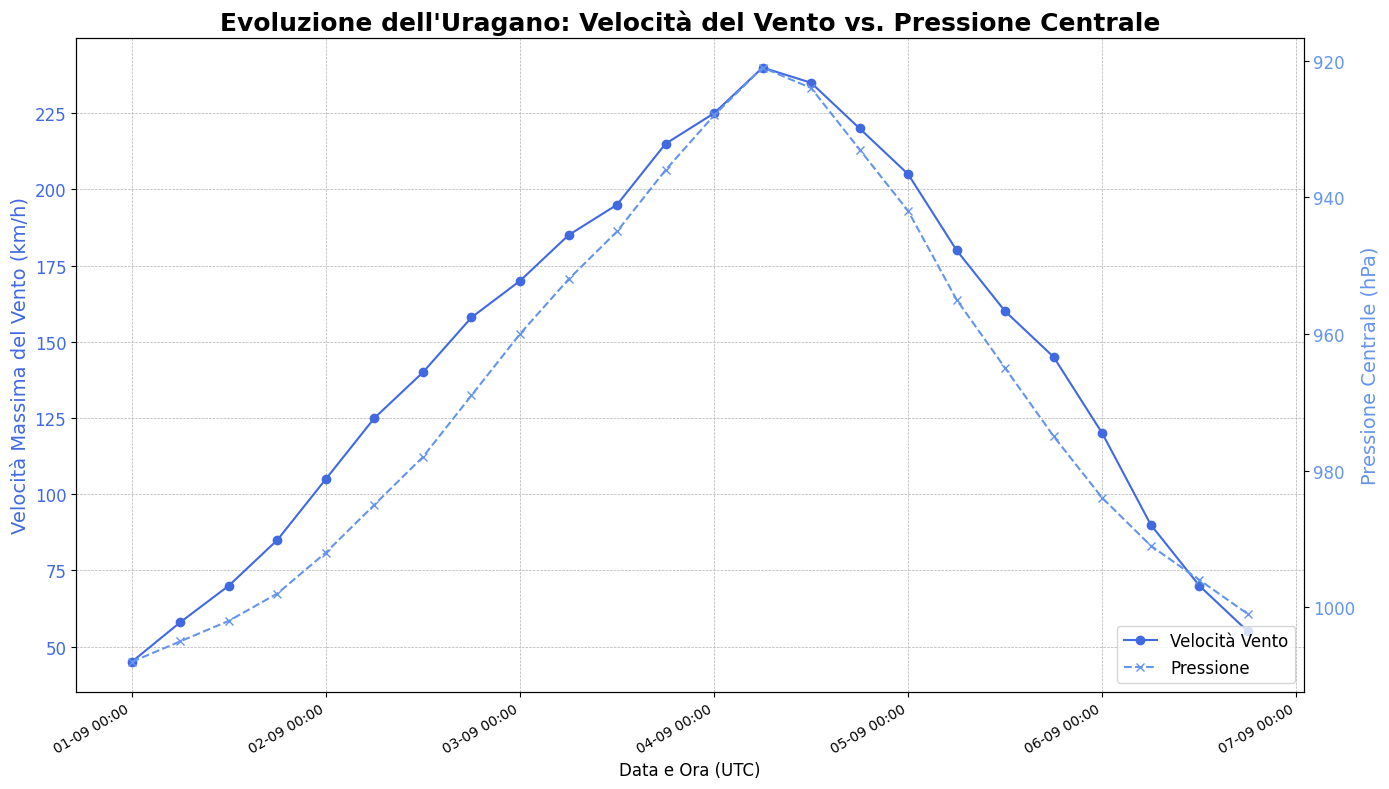

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

try:
    df = pd.read_csv("..\data\hurricane_data_satellite.csv")
except FileNotFoundError:
    print("Errore: File 'hurricane_data_satellite.csv' non trovato.")
    print("Assicurati che il file CSV sia nella stessa cartella dello script Python.")
    exit()

df['timestamp'] = pd.to_datetime(df['timestamp'])

fig, ax1 = plt.subplots(figsize=(14, 8))

color_wind = 'royalblue'
color_pressure = 'cornflowerblue'

ax1.set_xlabel('Data e Ora (UTC)', fontsize=12)
ax1.set_ylabel('Velocità Massima del Vento (km/h)', color=color_wind, fontsize=14)
ax1.plot(df['timestamp'], df['wind_speed_kmh'], color=color_wind, marker='o', linestyle='-', label='Velocità Vento')
ax1.tick_params(axis='y', labelcolor=color_wind, labelsize=12)
ax1.grid(True, which='major', linestyle='--', linewidth=0.5)

ax2 = ax1.twinx()

ax2.set_ylabel('Pressione Centrale (hPa)', color=color_pressure, fontsize=14)
ax2.invert_yaxis()
ax2.plot(df['timestamp'], df['pressure_hpa'], color=color_pressure, marker='x', linestyle='--', label='Pressione')
ax2.tick_params(axis='y', labelcolor=color_pressure, labelsize=12)

plt.title("Evoluzione dell'Uragano: Velocità del Vento vs. Pressione Centrale", fontsize=18, fontweight='bold')

fig.autofmt_xdate(rotation=30)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax1.tick_params(axis='x', labelsize=10)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right', fontsize=12)

fig.tight_layout()

plt.savefig('grafico_uragano_vento_pressione_blu.png', dpi=300)

plt.show()